# Ergodicity and Density Dynamics simulations

The parameters are saved in the file `parameters.jl`. Let's start by importing the module ST1Ds.jl

In [1]:
include("../src/ST1Ds.jl")
using ST1Ds

Let's import the parameters file

In [2]:
include("parameters.jl")

ST1Ds.Integrator{ODE.#ode45_dp}("RK45",ODE.ode45_dp)

And codify them in the predefined type Parameters

In [3]:
parameters = Parameters(results, T, Q, dtsampling, dt, nsimulations, nsteps, thermo, potential, integrator)

ST1Ds.Parameters("trajectory",1.0,0.1,0.0125,0.0125,3,50000,ST1Ds.Thermostat{##1#2}("logistic",0.1,#1),ST1Ds.Potential{##3#4}("quartic",#3),ST1Ds.Integrator{ODE.#ode45_dp}("RK45",ODE.ode45_dp))

You may change the parameters from here. For instance, let's change the integrator from an adaptative RK45 to a Runge Kutta RK4 with fixed stepsize (the integrator, for the moment, must be supported in the package [ODE.jl](https://github.com/JuliaDiffEq/ODE.jl)

In [4]:
parameters.integrator

ST1Ds.Integrator{ODE.#ode45_dp}("RK45",ODE.ode45_dp)

In [5]:
parameters.integrator = Integrator("RK4", ode4)

ST1Ds.Integrator{ODE.#ode4}("RK4",ODE.ode4)

And let's compute the lyapunov exponents by changing the parameter `results`

In [6]:
parameters.results = "lyapunov"

"lyapunov"

We are ready to calculate the Lyapunov Spectrum for `nsimulations` initial conditions

In [7]:
parameters.nsimulations

3

In [8]:
runsimulation(parameters)

Simulation1 done
Simulation2 done
Simulation3 done
File lyap3VSQv.hdf5 succesfully generated. See file in ../data/


The Lyapunov Spectrum were generated in the created folder ../data/. Let's explore them

In [9]:
using HDF5
file = h5open("../data/lyap3VSQv.hdf5")
sim1 = read(file["simulation-2"])

Dict{String,Any} with 4 entries:
  "exp2"        => -0.00292707
  "exp3"        => -0.275833
  "initialcond" => [1.06962,1.54251,-0.16238]
  "exp1"        => 0.279424

Now, let's integrate an initial random condition for a total time equal to `nsteps*dt*nsimulations`

In [11]:
parameters.results = "trajectory"

"trajectory"

In [12]:
runsimulation(parameters)

Part 1 done. 
Part 2 done.
Part 3 done.
Trajectory trajF5dGP.hdf5 succesfully generated. See file in ../data


The whole trajectory is saved in the file printed. Let's explore it

In [13]:
file = h5open("../data/trajF5dGP.hdf5")
trajectory = read(file["tx"])

150001×4 Array{Float64,2}:
    0.0     0.770123  -0.101452   0.00632879
    0.0125  0.76882   -0.107142  -0.00603537
    0.025   0.767441  -0.113652  -0.0183832 
    0.0375  0.765975  -0.12108   -0.0307112 
    0.05    0.76441   -0.129538  -0.0430151 
    0.0625  0.762731  -0.139151  -0.0552897 
    0.075   0.760925  -0.150061  -0.0675287 
    0.0875  0.758974  -0.162429  -0.0797238 
    0.1     0.756858  -0.176436  -0.0918654 
    0.1125  0.754555  -0.192286  -0.103941  
    0.125   0.752042  -0.21021   -0.115935  
    0.1375  0.74929   -0.230466  -0.127829  
    0.15    0.746269  -0.253343  -0.139599  
    ⋮                                       
 1874.86    1.30256    1.57748    0.0437062 
 1874.88    1.32181    1.4999     0.0608522 
 1874.89    1.34001    1.41079    0.0748629 
 1874.9     1.35705    1.31507    0.0856048 
 1874.91    1.37288    1.21679    0.0931493 
 1874.92    1.38747    1.11899    0.0977047 
 1874.94    1.40086    1.02386    0.0995558 
 1874.95    1.41309    0.932

The data is saved in the format 
    $$t \quad q \quad p \quad ζ$$
You may plot it

In [17]:
using PyPlot

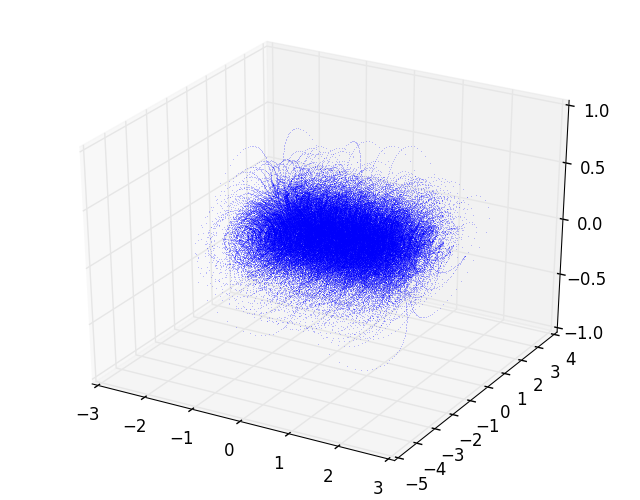

1-element Array{Any,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x7fcfb8187550>

In [21]:
plot3D(trajectory[:,2], trajectory[:,3], trajectory[:,4], ".", ms = 0.5, alpha = 0.3)